Regresión lineal con todas las variables

In [30]:
#Paquetes necesarios:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

#Se leen los datos del fichero
ciclistas = open ('/Users/34603/Desktop/TFG/Python/ciclistasVariablesSinNormalizarNiNombres.txt','r')
dataSet = list()
powerMean = list()

for linea in ciclistas: #Recorremos cada linea del archivo
    caracteristicas = linea.split()
    variables=[float(elemento) for elemento in caracteristicas[1:]]
    powerMean.append(float(caracteristicas[7])) #Vcetor de las variables a predecir
    dataSet.append(variables)
dataSet=np.array(dataSet) 


#Se va a querer predecir la variable potencia media que se encuentra en la posición (6):power mean
np.delete(dataSet, 6, axis=1) #Contiene las variables menos la que se quiere predecir.
num_Variables = len(dataSet[1,:])
num_Individuos = len(dataSet[:,1])

#Se recomienda tener los datos normalizados
mu=np.mean(dataSet,axis=0)
sigma=np.std(dataSet,axis=0)
dataSetNormalizado = ((dataSet-mu)/sigma)

#Se crea el conjunto de varables más informadas
dataSetReducido=dataSetNormalizado[:,[18,24,34,39,40,41]]


#Se crean los conjuntos de test y train con cross-validation utilizando una proporción de 0.3 para el test.
X_train, X_test, y_train, y_test = train_test_split(dataSetNormalizado, powerMean, test_size=0.3, random_state=42)

print(X_train1[:,4])

#Se crean los modelos de regresión lineal en función de C
Alpha2=np.linspace(0.0,100.0,100)
Alpha1=np.linspace(0.0,2000.0,100)
modelos1 = list()
modelos2 = list()


[526. 622. 844. 509. 499. 636. 474. 969. 734. 766. 754. 553. 573. 483.
 877.]


In [26]:
#Se seleccionan las variables más informadas.
np.shape(dataSetReducido)

(22, 6)

In [27]:

#Se crean los conjuntos de test y train con cross-validation utilizando una proporción de 0.3 para el test.
X_train, X_test, y_train, y_test = train_test_split(dataSetReducido, powerMean, test_size=0.3, random_state=42)



C:\Users\34603\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


El menor valor de RMSLE para el conjunto de testeo es: 0.013852784802971368
El valor del parámetro Alpha con el que se ha obtenido es: [0.]


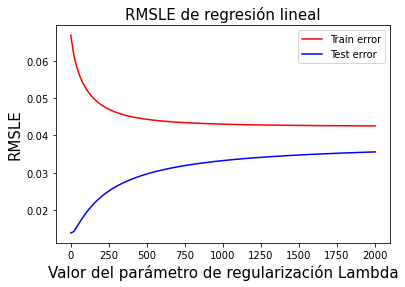

In [33]:
#Se continua calculando el error RMSLE:
n=len(dataSetNormalizado[0,:])
nReducido=(dataSetReducido[0,:])
RMSLEEntrenamiento1=list()
RMSLETesteo1 = list()
#Alpha1=np.linspace(0.0,2000.0,100)


for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train,y_train)
    prediccionTesteo = modelo_reg.predict(X_test)
    prediccionEntrenamiento = modelo_reg.predict(X_train)
    i=-1
    j=-1
    RMSLEtest=0
    RMSLEEntreno=0
    for p in prediccionTesteo:
        i=i+1
        RMSLEtest+= math.pow(math.log((p+1)/(y_test[i]+1)),2)
    for p in prediccionEntrenamiento:
        j=j+1
        RMSLEEntreno+= math.pow(math.log((p+1)/(y_train[i]+1)),2)
    RMSLEEntrenamiento1.append(math.sqrt((1/n)*RMSLEEntreno))
    RMSLETesteo1.append(math.sqrt((1/n)*RMSLEtest))
#Se busca el mejor error MSPE para el conjunto de testeo:
minMSPEtesteo = np.amin(RMSLETesteo1)
print('El menor valor de RMSLE para el conjunto de testeo es: ' + str(minMSPEtesteo))
#Ahora se busca el valor de C para el que se ha obtenido
posicion=np.where(RMSLETesteo1 == minMSPEtesteo)
#El valor del parámetro C con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))



#Grafica (CC1) con MSPE en función de C que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('RMSLE de regresión lineal', fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda', fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('RMSLE', fontsize=15)
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,RMSLEEntrenamiento1,'red', label = "Train error")
ax1.plot(Alpha1,RMSLETesteo1, 'blue',label = "Test error")
plt.legend()
plt.show()

El menor valor de MSPE para el conjunto de testeo es: 9.661003968906732


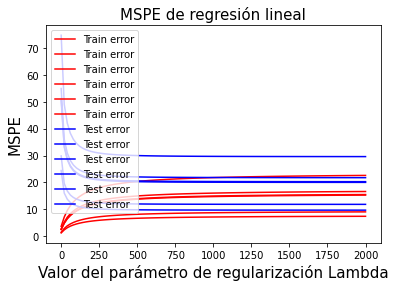

In [28]:
#Se continua calculando el error MSPE:
n=len(dataSetNormalizado[0,:])
nReducido=(dataSetReducido[0,:])
MSPEEntrenamiento1=list()
MSPETesteo1 = list()
#Alpha1=np.linspace(0.0,2000.0,100)


for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train,y_train)
    prediccionTesteo = modelo_reg.predict(X_test)
    prediccionEntrenamiento = modelo_reg.predict(X_train)
    i=-1
    j=-1
    MSPEtest=0
    MSPEEntreno=0
    for p in prediccionTesteo:
        i=i+1
        MSPEtest+= math.pow((y_test[i]-p)/y_test[i],2)
    for p in prediccionEntrenamiento:
        j=j+1
        MSPEEntreno+= math.pow((y_train[i]-p)/y_train[i],2)
    MSPEEntrenamiento1.append(100*MSPEtest/n)
    MSPETesteo1.append(100*MSPEEntreno/n)
#Se busca el mejor error MSPE para el conjunto de testeo:
minMSPEtesteo = np.amin(MSPETesteo1)
print('El menor valor de MSPE para el conjunto de testeo es: ' + str(minMSPEtesteo))
#Ahora se busca el valor de C para el que se ha obtenido
##posicion=np.where(MSPETesteo1 == minMSPEtesteo)
#El valor del parámetro C con el que se ha obtenido es: 
##print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))



#Grafica (CC1) con MSPE en función de C que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('MSPE de regresión lineal', fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda', fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('MSPE', fontsize=15)
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,MSPEEntrenamiento1,'red', label = "Train error")
ax1.plot(Alpha1,MSPETesteo1, 'blue',label = "Test error")
plt.legend()
plt.show()

C:\Users\34603\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


El menor valor de MAPE del conjunto de testeo es: 0.37893259608000346
El valor del parámetro Alpha con el que se ha obtenido es: [10.1010101]


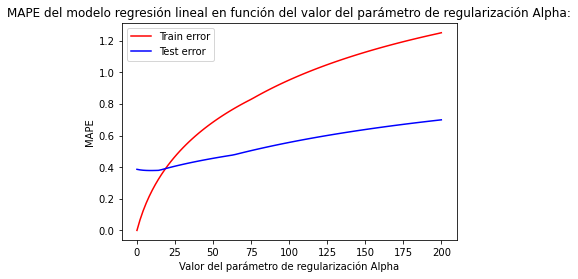

Valor de MAPE intersección:  0.389507221802219 Valor de lambda en la intersección:  18.181818181818183


In [39]:
#Se continua calculando el error MAPE:
n=len(dataSetNormalizado[0,:])
MAPEEntrenamiento1=list()
MAPETesteo1 = list()

for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train,y_train)
    prediccionTesteo = modelo_reg.predict(X_test)
    prediccionEntrenamiento = modelo_reg.predict(X_train)
    i=-1
    j=-1
    MAPEtest=0
    MAPEEntreno=0
    for p in prediccionTesteo:
        i=i+1
        MAPEtest+= abs(y_test[i]-p)/abs(y_test[i])
    for p in prediccionEntrenamiento:
        j=j+1
        MAPEEntreno+= abs(y_train[j]-p)/abs(y_train[j])
    MAPETesteo1.append(100*MAPEtest/n)
    MAPEEntrenamiento1.append(100*MAPEEntreno/n)

#Se busca el menor valor del MAPE
maxMAPEtesteo = np.amin(MAPETesteo1)
print('El menor valor de MAPE del conjunto de testeo es: ' + str(maxMAPEtesteo))
#Ahora se busca el valor de C para el que se ha obtenido
posicion=np.where(MAPETesteo1 == maxMAPEtesteo)
#El valor del parámetro C con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (CC1) con MAPE en función de C que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('MAPE del modelo regresión lineal en función del valor del parámetro de regularización Alpha:')
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Alpha')
 # Establecer etiqueta del eje Y
plt.ylabel('MAPE')
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,MAPEEntrenamiento1,'red',label="Train error")
ax1.plot(Alpha1,MAPETesteo1,'blue',label="Test error")
plt.legend()
plt.show()

k =- 1
Interseccion = 0
lambdaInterseccion = 0
for MAPE in MAPETesteo1:
    k=k+1
    if (MAPE - MAPEEntrenamiento1[k])<0.01:
        Interseccion = MAPE
        lambdaInterseccion = Alpha1[k]
        break
        
print('Valor de MAPE intersección: ', str(Interseccion), 'Valor de lambda en la intersección: ', str(lambdaInterseccion))

C:\Users\34603\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\34603\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


mayor valor del coeficiente de determinación para el conjunto de testeo es 0.8821036707127499
El mayor valor del coeficiente de determinación ajustado para el conjunto de testeo es: 0.8802615405676366
El valor del parámetro Alpha con el que se ha obtenido es: [2.2022022]


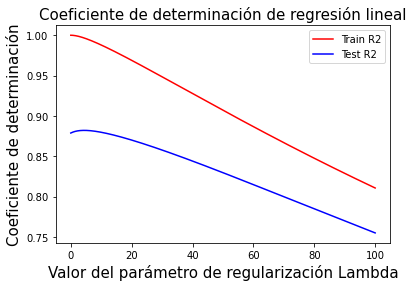

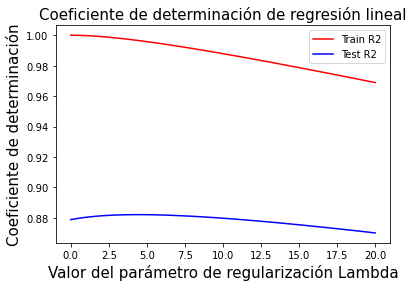

In [10]:
R2Entrenamiento1 = list()
R2Testeo1 = list()
n=len(dataSetNormalizado[0,:])

R2Entrenamiento2 = list()
R2testeo2 = list()

Alpha1=np.linspace(0.0,100.0,1000)
Alpha2=np.linspace(0.0,20.0,100)

for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train,y_train)
    modelos1.append(modelo_reg)
    R2Entrenamiento1.append(modelo_reg.score(X_train,y_train))
    R2Testeo1.append(modelo_reg.score(X_test,y_test))
for alpha in Alpha2:
    modelo_reg=Ridge(alpha).fit(X_train,y_train)
    modelos2.append(modelo_reg)
    R2Entrenamiento2.append(modelo_reg.score(X_train,y_train))
    R2testeo2.append(modelo_reg.score(X_test,y_test))
    
#Se busca el mayor valor del coeficiente de determinación
maxR2testeo = np.amax(R2testeo2)
print('mayor valor del coeficiente de determinación para el conjunto de testeo es ' + str(maxR2testeo))
R2Ajustado=1-((num_Variables-1)/(num_Variables-2))*(1-maxR2testeo)
print('El mayor valor del coeficiente de determinación ajustado para el conjunto de testeo es: ' + str(R2Ajustado))
#Ahora se busca el valor de C para el que se ha obtenido
posicion=np.where(R2testeo2 == np.amax(R2testeo2))
#El valor del parámetro C con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (Alpha1) con r^2 en función de Alpha que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('Coeficiente de determinación de regresión lineal', fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda', fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('Coeficiente de determinación', fontsize=15)
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,R2Entrenamiento1,'red', label="Train R2")
ax1.plot(Alpha1,R2Testeo1,'blue', label="Test R2")
plt.legend()
plt.show()

#Grafica (Alpha2) con r^2 en función de Alpha que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal2 = plt.figure()
ax2 = figRegresionLineal2.add_subplot(111)
 # Establecer título
ax2.set_title('Coeficiente de determinación de regresión lineal', fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda', fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('Coeficiente de determinación', fontsize=15)
 # Dibujar diagrama de dispersión
ax2.plot(Alpha2,R2Entrenamiento2,'red',label="Train R2")
ax2.plot(Alpha2,R2testeo2,'blue',label="Test R2")
plt.legend()
plt.show()


C:\Users\34603\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


El menor valor de RMSE del conjunto de testeo es: 3.964524116761737
El valor del parámetro Alpha con el que se ha obtenido es: [4.4044044]


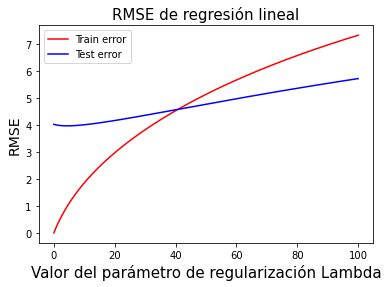

Valor de RMSE intersección:  4.572395835889082 Valor de lambda en la intersección:  40.64064064064064


In [11]:
#Cálculo de RMSE:
n=len(dataSetNormalizado[0,:])
RMSEEntrenamiento1 = list()
RMSETesteo1 = list()

for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train,y_train)
    prediccionTesteo = modelo_reg.predict(X_test)
    prediccionEntrenamiento = modelo_reg.predict(X_train)
    i=-1
    j=-1
    RMSEtest=0
    RMSEEntreno=0
    for p in prediccionTesteo:
        i=i+1
        RMSEtest+= math.pow(y_test[i]-p,2)
    for p in prediccionEntrenamiento:
        j=j+1
        RMSEEntreno+= math.pow(y_train[j]-p,2)
    RMSEEntrenamiento1.append(math.sqrt(RMSEEntreno/n))
    RMSETesteo1.append(math.sqrt(RMSEtest/n))

#Se busca el menor valor del RMSE
maxRMSEtesteo = np.amin(RMSETesteo1)
print('El menor valor de RMSE del conjunto de testeo es: ' + str(maxRMSEtesteo))
#Ahora se busca el valor de C para el que se ha obtenido
posicion=np.where(RMSETesteo1 == maxRMSEtesteo)
#El valor del parámetro C con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (Alpha1) con RMSE en función de Alpha que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('RMSE de regresión lineal', fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda', fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('RMSE',fontsize=14)
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,RMSEEntrenamiento1,'red',label="Train error")
ax1.plot(Alpha1,RMSETesteo1,'blue', label = "Test error")
plt.legend()
plt.show()

k =- 1
Interseccion = 0
lambdaInterseccion = 0
for RMSE in RMSETesteo1:
    k=k+1
    if (RMSE - RMSEEntrenamiento1[k])<0.01:
        Interseccion = RMSE
        lambdaInterseccion = Alpha1[k]
        break
        
print('Valor de RMSE intersección: ', str(Interseccion), 'Valor de lambda en la intersección: ', str(lambdaInterseccion))

C:\Users\34603\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


El menor valor de MAE del conjunto de testeo es: 1.1343330231836406
El valor del parámetro Alpha con el que se ha obtenido es: [10.1010101]


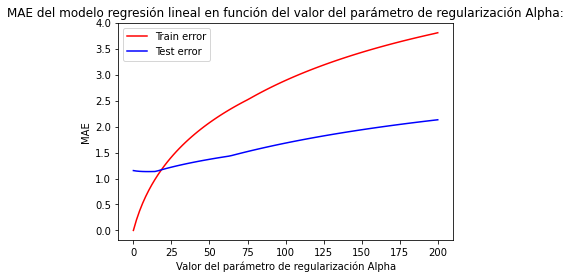

Valor de MAE intersección:  1.1669992040024837 Valor de lambda en la intersección:  18.181818181818183


In [41]:
#Cálculo de MAE:

MAEEntrenamiento1 = list()
MAETesteo1 = list()

for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train,y_train)
    prediccionTesteo = modelo_reg.predict(X_test)
    prediccionEntrenamiento = modelo_reg.predict(X_train)
    i=-1
    j=-1
    MAEtest=0
    MAEEntreno=0
    for p in prediccionTesteo:
        i=i+1
        MAEtest+= abs(y_test[i]-p)
    for p in prediccionEntrenamiento:
        j=j+1
        MAEEntreno+= abs(y_train[j]-p)
    MAEEntrenamiento1.append(MAEEntreno/num_Variables)
    MAETesteo1.append(MAEtest/num_Variables)

#Se busca el menor valor del MAE
minMAEtesteo = np.amin(MAETesteo1)
print('El menor valor de MAE del conjunto de testeo es: ' + str(minMAEtesteo))
#Ahora se busca el valor de C para el que se ha obtenido
posicion=np.where(MAETesteo1 == minMAEtesteo)
#El valor del parámetro C con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (Alpha1) con MAE en función de Alpha que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('MAE del modelo regresión lineal en función del valor del parámetro de regularización Alpha:')
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Alpha')
 # Establecer etiqueta del eje Y
plt.ylabel('MAE')
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,MAEEntrenamiento1,'red',label="Train error")
ax1.plot(Alpha1,MAETesteo1,'blue',label="Test error")
plt.legend()
plt.show()

k =- 1
Interseccion = 0
lambdaInterseccion = 0
for MAE in MAETesteo1:
    k=k+1
    if (MAE - MAEEntrenamiento1[k])<0.01:
        Interseccion = MAE
        lambdaInterseccion = Alpha1[k]
        break
        
print('Valor de MAE intersección: ', str(Interseccion), 'Valor de lambda en la intersección: ', str(lambdaInterseccion))

C:\Users\34603\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


El menor valor de MSE del conjunto de testeo es: 15.719485842351101
El valor del parámetro Alpha con el que se ha obtenido es: [4.04040404]


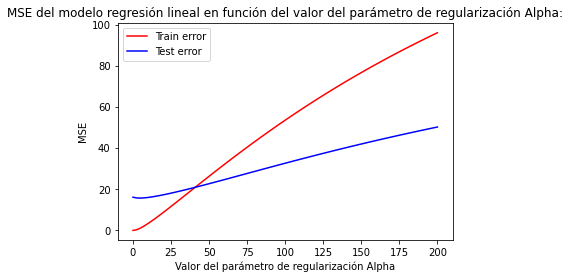

Valor de MSE intersección:  21.244570320342167 Valor de lambda en la intersección:  42.42424242424243


In [42]:
#Cálculo de MSE:

MSEEntrenamiento1 = list()
MSETesteo1 = list()
n=len(dataSetNormalizado[0,:])
for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train,y_train)
    prediccionTesteo = modelo_reg.predict(X_test)
    prediccionEntrenamiento = modelo_reg.predict(X_train)
    i=-1
    j=-1
    MSEtest=0
    MSEEntreno=0
    for p in prediccionTesteo:
        i=i+1
        MSEtest+= math.pow(y_test[i]-p,2)
    for p in prediccionEntrenamiento:
        j=j+1
        MSEEntreno+= math.pow(y_train[j]-p,2)
    MSEEntrenamiento1.append(MSEEntreno/n)
    MSETesteo1.append(MSEtest/n)

#Se busca el menor valor del MAE
minMSEtesteo = np.amin(MSETesteo1)
print('El menor valor de MSE del conjunto de testeo es: ' + str(minMSEtesteo))
#Ahora se busca el valor de Alpha para el que se ha obtenido
posicion=np.where(MSETesteo1 == minMSEtesteo)
#El valor del parámetro Alpha con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (Alpha1) con MSE en función de Alpha que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('MSE del modelo regresión lineal en función del valor del parámetro de regularización Alpha:')
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Alpha')
 # Establecer etiqueta del eje Y
plt.ylabel('MSE')
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,MSEEntrenamiento1,'red',label="Train error")
ax1.plot(Alpha1,MSETesteo1,'blue',label="Test error")
plt.legend()
plt.show()

k =- 1
Interseccion = 0
lambdaInterseccion = 0
for MSE in MSETesteo1:
    k=k+1
    if (MSE - MSEEntrenamiento1[k])<0.01:
        Interseccion = MSE
        lambdaInterseccion = Alpha1[k]
        break
        
print('Valor de MSE intersección: ', str(Interseccion), 'Valor de lambda en la intersección: ', str(lambdaInterseccion))